# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


In [3]:
# cities = cities[:5]
# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city +"&units=metric"
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bairnsdale
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | kahla
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | tarakan
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | taksimo
Processing Record 11 of Set 1 | portland
Processing Record 12 of Set 1 | limassol
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | brazzaville
Processing Record 15 of Set 1 | guerrero negro
Processing Record 16 of Set 1 | nuuk
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | rongelap
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | adamstown
Processing 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bairnsdale,-37.8333,147.6167,8.36,95,100,1.04,AU,1685740746
1,edinburgh of the seven seas,-37.0676,-12.3116,13.89,66,73,7.09,SH,1685740747
2,kahla,50.8000,11.5833,13.30,73,67,2.58,DE,1685740747
3,bilibino,68.0546,166.4372,7.40,44,98,5.85,RU,1685740748
4,port lincoln,-34.7333,135.8667,15.13,57,100,2.40,AU,1685740748


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bairnsdale,-37.8333,147.6167,8.36,95,100,1.04,AU,1685740746
1,edinburgh of the seven seas,-37.0676,-12.3116,13.89,66,73,7.09,SH,1685740747
2,kahla,50.8000,11.5833,13.30,73,67,2.58,DE,1685740747
3,bilibino,68.0546,166.4372,7.40,44,98,5.85,RU,1685740748
4,port lincoln,-34.7333,135.8667,15.13,57,100,2.40,AU,1685740748


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

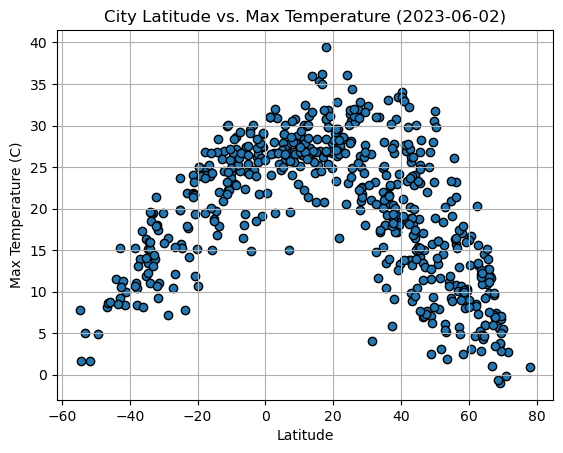

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2023-06-02)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

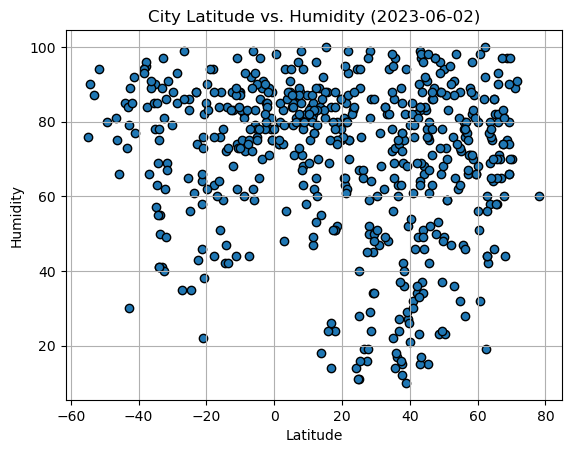

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (2023-06-02)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

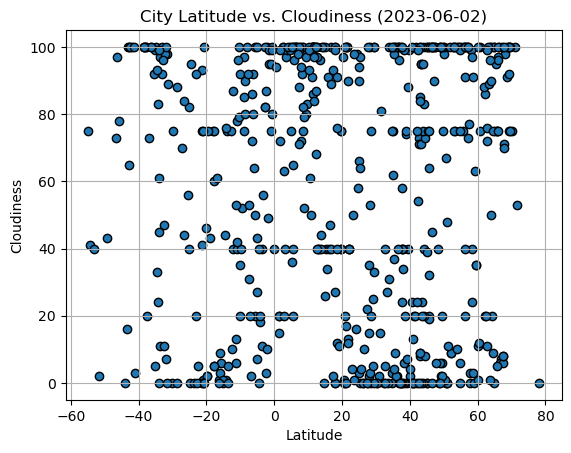

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (2023-06-02)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

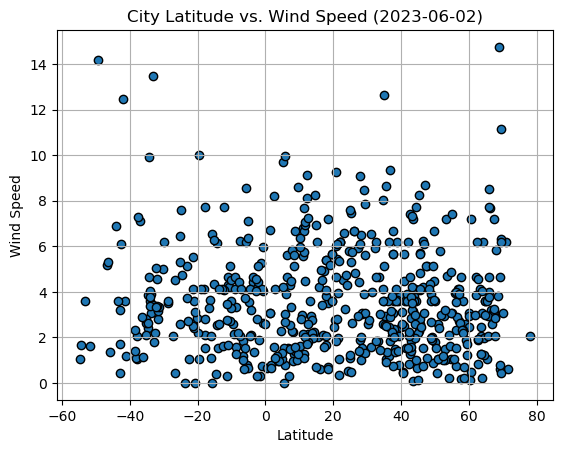

In [12]:
# Build the scatter plots for latitude vs. Wind Speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (2023-06-02)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_df['Lat'], city_data_df['Max Temp'])

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

In [15]:
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kahla,50.8000,11.5833,13.30,73,67,2.58,DE,1685740747
3,bilibino,68.0546,166.4372,7.40,44,98,5.85,RU,1685740748
6,tarakan,3.3000,117.6333,26.72,94,40,1.03,ID,1685740749
7,jamestown,42.0970,-79.2353,29.77,34,0,6.17,US,1685740487
9,taksimo,56.3444,114.8794,10.84,76,91,0.73,RU,1685740750


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bairnsdale,-37.8333,147.6167,8.36,95,100,1.04,AU,1685740746
1,edinburgh of the seven seas,-37.0676,-12.3116,13.89,66,73,7.09,SH,1685740747
4,port lincoln,-34.7333,135.8667,15.13,57,100,2.40,AU,1685740748
5,puerto ayora,-0.7393,-90.3518,28.98,88,80,4.02,EC,1685740748
8,cidreira,-30.1811,-50.2056,19.49,79,0,4.98,BR,1685740749


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7557009556171967


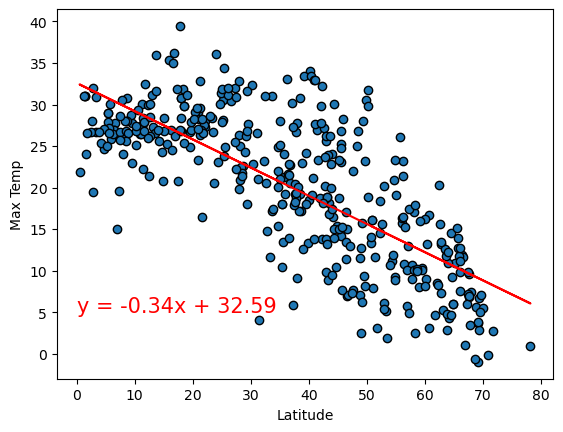

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
regress_values

plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")

# Labx_values plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (0,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

In [18]:
# Discussion about the linear relationship: The r-value of -0.7247 indicates a strong negative correlation between 
# latitude and maximum temperature in the Northern Hemisphere.

The r-value is: 0.8424551210512905


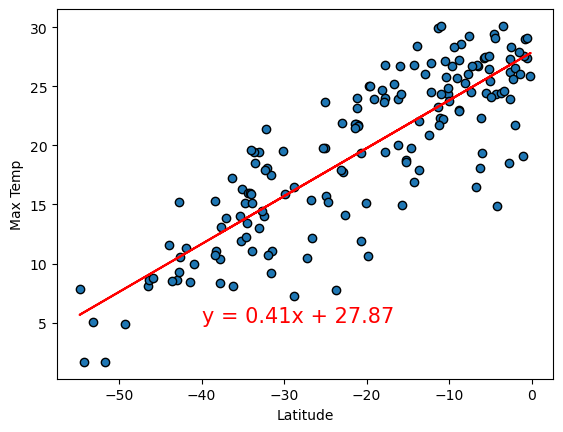

In [19]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hemi_df['Lat'] * slope + intercept

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], edgecolor = 'black')
plt.plot(southern_hemi_df['Lat'], regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq, (-40,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

In [20]:
# Discussion about the linear relationship: The r-value of 0.8278 indicates a strong positive correlation between 
# latitude and maximum temperature in the Southern Hemisphere (The different hemispheres displayed differing trends with similar strengths). 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.07149621316024805


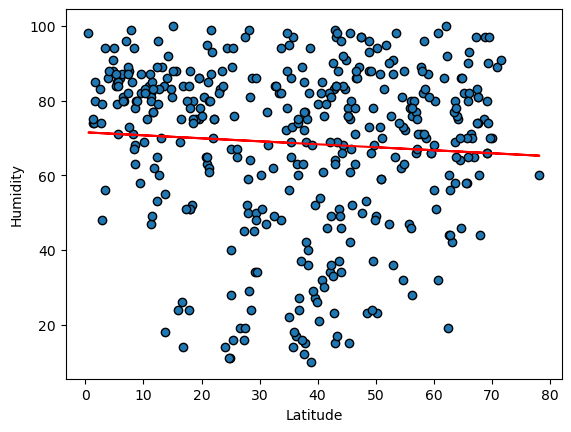

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
regress_values

plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")

# Labx_values plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq, (40,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

In [22]:
# Discussion about the linear relationship: The r-value of -0.0498 indicates a very weak negative correlation between 
# Latitude and Humidity in the Northern Hemisphere

The r-value is: 0.050469736141734466


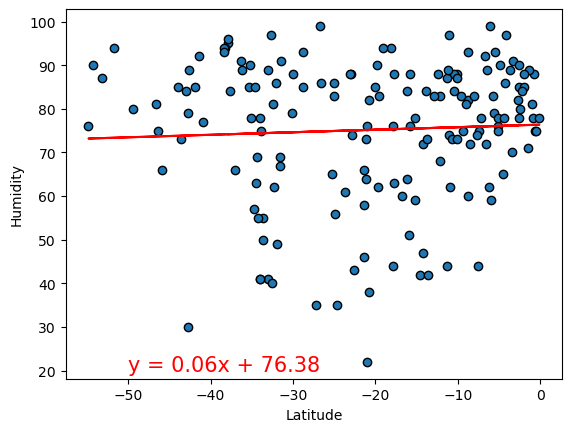

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
regress_values

plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")

# Labx_values plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq, (-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

In [24]:
# Discussion about the linear relationship: The r-value of 0.0734 indicates a very weak positive correlation between 
# Latitude and Humidity in the Southern Hemisphere (The different hemispheres displayed differing trends with similar strengths).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.07432817851777795


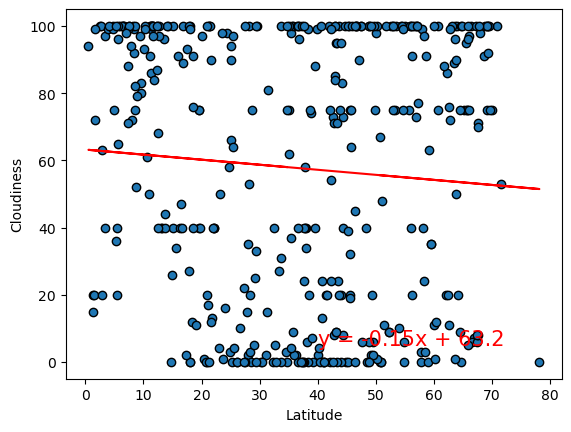

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
regress_values

plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")

# Labx_values plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq, (40,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

In [26]:
# Discussion about the linear relationship: The r-value of -0.0951 indicates a very weak negative correlation between 
# Latitude and Cloudiness in the Northern Hemisphere 

The r-value is: -0.07546060895715553


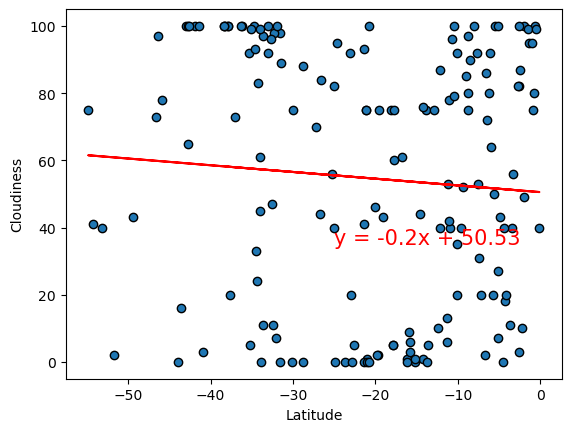

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
regress_values

plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")

# Labx_values plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq, (-25,35),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

In [28]:
# Discussion about the linear relationship: The r-value of 0.0666 indicates a very weak positive correlation between 
# Latitude and Cloudiness in the Southern Hemisphere (The different hemispheres displayed differing trends with similar strength).

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.05310055892989099


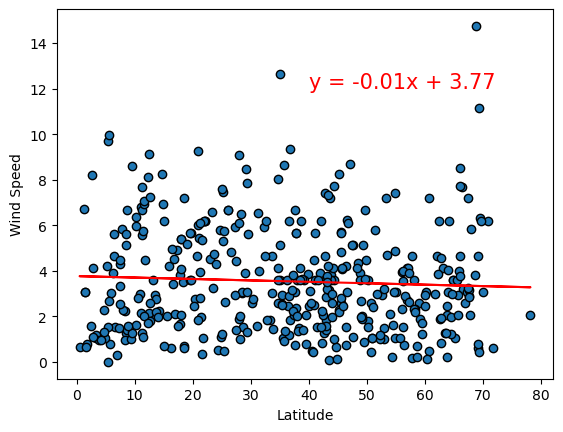

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
regress_values

plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")

# Labx_values plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq, (40,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

In [30]:
# Discussion about the linear relationship: The r-value of -0.0488 indicates a very weak negative correlation between 
# Latitude and Wind Speed in the Northern Hemisphere 

The r-value is: -0.10395163961498063


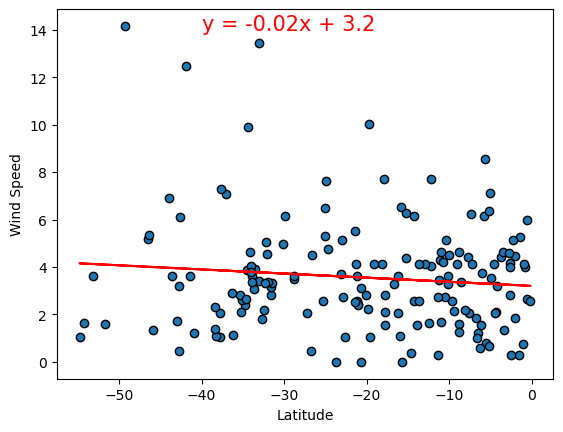

In [31]:
# Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
regress_values

plt.scatter(x_values, y_values, edgecolor = 'black')
plt.plot(x_values, regress_values, "r-")

# Labx_values plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq, (-40,14),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

In [32]:
# Discussion about the linear relationship: The r-value of -0.2189 indicates a very weak negative correlation between 
# Latitude and Wind Speed in the Southern Hemisphere (The different hemispheres displayed similar trends with similar strength).

**Discussion about the linear relationship:** YOUR RESPONSE HERE